# ĐỒ ÁN CUỐI KỲ MÔN LẬP TRÌNH CHO KHOA HỌC DỮ LIỆU

*Giảng viên: Thầy Trần Trung Kiên*

---

**Nhóm sinh viên thực hiện:**

Sinh viên 01: Trương Trọng Lộc - 18120197

Sinh viên 02: Dương Nam Hải - 19120068

---

## Import các thư viện cần thiết

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

---

## Thu thập dữ liệu

### Tổng quan về dữ liệu

- Tập dữ liệu được sử dụng trong đồ án là tập dữ liệu về các **nhân tố có thể tác động đến tuổi thọ** con người 
(chẳng hạn về giáo dục, y tế, kinh tế) của 183 quốc gia trên thế giới từ năm 2000-2016. Tập dữ liệu tên là **WHO national life expectancy**.
- Tập dữ liệu được lấy và download từ Kaggle thông qua [đường dẫn](https://www.kaggle.com/mmattson/who-national-life-expectancy), bộ dữ liệu do tác giả MMattson thu thập.

### Dữ liệu được phép sử dụng hay không?

License của tập dữ liệu này là [CC0 - Public Domain](https://creativecommons.org/publicdomain/zero/1.0/). Với license này thì ta có thể sử dụng tập dữ liệu mà không cần xin phép tác giả. Cụ thể, license này thể hiện tác giả đã từ bỏ quyền sở hữu của bản thân để trao quyền cho người khác có thể sử dụng để chỉnh sửa, phân phối,... dưới bất kỳ hình thức nào trong phạm vi pháp luật (có thể là học tập, nghiên cứu, thương mại,...).

### Dữ liệu được thu thập như thế nào?

* Dữ liệu được thu thập từ dữ liệu của Tổ chức Y tế Thế giới (World Health Organization) thông qua cả 3 cách sau: 
    * Trang web dữ liệu Thống kê về Giáo dục các Quốc gia của Viện thống kê UNESCO ([UNESCO Databases of Resources on Education](https://en.unesco.org/themes/education/databases));
    * API từ [GHO (Global Health Observatory)](https://www.who.int/data/gho/);
    * Thủ công.
* Chi tiết về cách thu thập dữ liệu có thể tham khảo tại notebook của tác giả tại [đây](https://www.kaggle.com/mmattson/template-to-generate-the-dataset).

---

## Khám phá dữ liệu

### Đọc dữ liệu từ file CSV vào dataframe

Dữ liệu được lưu trong 1 file CSV duy nhất `who_life_exp.csv` và được chứa trong thư mục Data. Ta sử dụng thư viện Pandas để đọc dữ liệu từ CSV này vào Data Frame.

In [2]:
life_exp_df = pd.read_csv('./Data/who_life_exp.csv')
life_exp_df.head()

,country,country_code,region,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,...,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
0,Angola,AGO,Africa,2000,47.33730,14.73400,383.5583,0.137985,0.025695,1.47439,...,1.90860,16395.473,122.2,46.522,1.0,2530.0,32.3,2.60753,NaN,NaN
1,Angola,AGO,Africa,2001,48.19789,14.95963,372.3876,0.133675,0.024500,1.94025,...,4.48352,16945.753,118.9,47.059,1.1,2630.0,NaN,NaN,67.40542,NaN
2,Angola,AGO,Africa,2002,49.42569,15.20010,354.5147,0.128320,0.023260,2.07512,...,3.32946,17519.417,115.1,47.702,1.2,3180.0,NaN,NaN,NaN,NaN
3,Angola,AGO,Africa,2003,50.50266,15.39144,343.2169,0.122040,0.021925,2.20275,...,3.54797,18121.479,110.8,48.440,1.3,3260.0,NaN,NaN,NaN,NaN
4,Angola,AGO,Africa,2004,51.52863,15.56860,333.8711,0.115700,0.020545,2.41274,...,3.96720,18758.145,106.2,49.263,1.3,3560.0,NaN,NaN,NaN,NaN


### Dữ liệu gồm có bao nhiêu dòng và bao nhiêu cột?

In [3]:
num_rows, num_cols = life_exp_df.shape
num_rows, num_cols

(3111, 32)

**Nhận xét:** 
* Tập dữ liệu gồm 3111 dòng và 32 cột.
* Ngoài ra, theo thông tin của bộ dữ liệu, dữ liệu được khảo sát từ năm 2000-2016 ở 183 quốc gia, điều này hoàn toàn phù hợp với kết quả là 3111 dòng (nói cách dễ hiểu là do 2000-2016 là 17 năm, ta lấy 17 năm * 183 quốc gia = 3111 dòng, dự đoán ban đầu của nhóm em là vậy ^^ Nhóm em sẽ khảo sát ở phần sau xem thử có đúng như dự đoán không).

### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

* Theo quan sát, mỗi dòng thể hiện thông tin về các yếu tố có thể ảnh hưởng đến tuổi thọ (tỉ lệ tiêm chủng, dân số, tỉ lệ người lớn biết chữ, thu nhập bình quân,...) của **một quốc gia** trong **một năm**. 
* Có vẻ **không** có dòng nào có ý nghĩa khác nhau. 

### Dữ liệu có các dòng bị lặp không?

Kiểm tra việc này và lưu kết quả vào biến `have_duplicated_rows`. Biến này sẽ có giá trị True nếu dữ liệu có các dòng bị lặp và có giá trị False nếu ngược lại.

In [4]:
have_duplicated_rows = life_exp_df.duplicated().sum()
if have_duplicated_rows != 0:
    print("Có dòng dữ liệu bị lặp")
else:
    print("Không có dữ liệu trùng lặp")

Không có dữ liệu trùng lặp


### Mỗi cột có ý nghĩa gì?

Theo mô tả trên Kaggle, mỗi cột có ý nghĩa như sau:

|Tên cột dữ liệu | Mô tả |
|:------:| ---|
|Country| Tên quốc gia khảo sát |
|country_code| Mã định danh quốc gia (3 chữ cái)|
|region| Khu vực của quốc gia khảo sát|
|year| Năm khảo sát|
|life_expect| Tuổi thọ kì vọng khi sinh (đơn vị năm) |
|life_exp60| Tuổi thọ kì vọng còn lại khi 60 tuổi (đơn vị năm)|
|adult_mortality|Tỷ lệ tử vong của người trưởng thành (xác suất tử vong từ 15 đến 60 tuổi trên 1000 dân số)|
|infant_mort|Tỷ lệ tử vong dưới 1 tuổi|
|age1-4mort|Tỷ lệ tử vong từ 1 đến 4 tuổi|
|alcohol|Mức tiêu thụ rượu bình quân đầu người từ 15 tuổi trở lên (tính bằng rượu nguyên chất)|
|bmi|BMI trung bình (từ 18 tuổi trở lên) (ước tính chuẩn hóa theo độ tuổi)|
|age5-19thinness|Tỷ lệ suy dinh dưỡng ở trẻ em và thanh thiếu niên (%)|
|age5-19obesity	|Tỷ lệ béo phì ở trẻ em và thanh thiếu niên (%)|
|hepatitis|Tỷ lệ tiêm ngừa viêm gan siêu vi B (HepB) ở trẻ 1 tuổi (%)|
|measles|Tỷ lệ tiêm ngừa sởi mũi đầu tiên (MCV1) ở trẻ 1 tuổi (%)|
|polio| Tỷ lệ tiêm ngừa bại liệt (Pol3) ở trẻ 1 tuổi (%)|
|diphtheria|Tỷ lệ tiêm ngừa bạch hầu, uốn ván và ho gà (DTP3) cho trẻ 1 tuổi (%)|
|basic_water|Tỷ lệ dân số được tiếp cận các dịch vụ nước cơ bản|
|doctors|Mật độ bác sĩ y khoa trên 10.000 dân|
|hospitals|Mật độ bệnh viện trên 100.000 dân|
|gni_capita|Tổng thu nhập quốc dân trên đầu người, đơn vị $ (tổng thu thập mà người dân và doanh nghiệp của quốc gia kiếm được)|
|gghe-d	|Chi tiêu từ ngân sách chính phủ cho lĩnh vực y tế tính theo tỷ lệ phần trăm của tổng sản phẩm quốc nội (GDP) (%)|
|che_gdp|Chi phí người dân bỏ ra cho dịch vụ y tế (CHE) tính theo phần trăm tổng sản phẩm quốc nội (GDP) (%)|
|une_pop|Dân số (đơn vị nghìn)|
|une_infant|Tỷ lệ tử vong ở trẻ sơ sinh trên 1.000 ca sinh sống)|
|une_life|Tuổi thọ kì vọng nếu các hình thức tử vong phổ biến tại thời điểm được sinh ra không thay đổi trong suốt cuộc đời của trẻ|
|une_hiv|Tỷ lệ nhiễm HIV, đơn vị \% trên tổng dân số từ 15-49 tuổi|
|une_gni|Thu nhập quốc dân trên đầu người|
|une_poverty|Tỷ lệ số người nghèo có mức sống 1,90 đô la một ngày (PPP) (\% trên dân số)|
|une_edu_spend|Chi tiêu của chính phủ cho giáo dục tính theo phần trăm GDP (\%)|
|une_literacy|Tỷ lệ người lớn biết chữ, cả hai giới (dân số trên 15 tuổi) (\%)|
|une_school|Số năm đi học trung bình (ISCED 1 trở lên), cả hai giới (dân số trên 25 tuổi)|

**Các thuộc tính có tên `une_`** được thống kê bởi tổ chức UNESCO.

**Các thuộc tính còn lại** được thống kê bởi GHO (Global Health Observatory).


### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [5]:
col_dtypes = life_exp_df.dtypes
col_dtypes

country             object
country_code        object
region              object
year                 int64
life_expect        float64
life_exp60         float64
adult_mortality    float64
infant_mort        float64
age1-4mort         float64
alcohol            float64
bmi                float64
age5-19thinness    float64
age5-19obesity     float64
hepatitis          float64
measles            float64
polio              float64
diphtheria         float64
basic_water        float64
doctors            float64
hospitals          float64
gni_capita         float64
gghe-d             float64
che_gdp            float64
une_pop            float64
une_infant         float64
une_life           float64
une_hiv            float64
une_gni            float64
une_poverty        float64
une_edu_spend      float64
une_literacy       float64
une_school         float64
dtype: object

**Nhận xét:** Các cột có kiểu dữ liệu không phải `object` phù hợp, cần làm rõ hơn 3 cột có kiểu dữ liệu đang là `object`, trong Python kiểu dữ liệu `object` thường chỉ chuỗi, nhưng thật chất nó có thể chứa đối tượng bất kỳ vì bên dưới lưu dưới dạng địa chỉ. Trong Data Frame, nếu một cột có `dtype` là `object` thì có thể các phần tử trong cột này sẽ có kiểu dữ liệu khác nhau. Do đó, cần khảo sát từng cột có `dtype` là `object`.

In [6]:
# Hàm trả về các kiểu dữ liệu trong 1 cột
def open_object_dtype(s):
    dtypes = set()
    
    dtypes = set(s.apply(type))
    
    return dtypes

In [7]:
print(open_object_dtype(life_exp_df['country']))
print(open_object_dtype(life_exp_df['country_code']))
print(open_object_dtype(life_exp_df['region']))

{<class 'str'>}
{<class 'str'>}
{<class 'str'>}


Như vậy, cả 3 cột đều có 1 kiểu dữ liệu duy nhất là `str`. 
Do đó **tất cả các cột** trong tập dữ liệu đều đang có kiểu dữ liệu **phù hợp**.

### Với mỗi cột có kiểu dữ liệu dạng numeric, các giá trị được phân bố như thế nào?

* Trong 32 cột dữ liệu của dataset, theo khám phá ở trên có 3 cột là `country`, `country_code` và `region` dạng `object` (cụ thể hơn là `str`). Do đó, ta có tổng cộng 29 cột có kiểu dữ liệu dạng numeric (bài này là `in64` và `float64`). 
* Với mỗi cột numeric, tính tỉ lệ % giá trị thiếu (từ 0 đến 100), min, max. Kết quả được vào Data Frame `nume_col_df`. Dataframe này có 9 dòng là "missing_ratio", "count", "mean", "std", "min", "25%", "50%", "75%", "max"; và có 29 cột tương ứng với các cột có `dtype` là `int64` hoặc `float64`.  

In [8]:
def missing_ratio(s):
    return s.isna().mean() * 100
missing_df = life_exp_df.iloc[:,3:].agg([missing_ratio])
nume_col_df = pd.concat([missing_df, life_exp_df.iloc[:,3:].describe()])
nume_col_df

,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,bmi,age5-19thinness,age5-19obesity,...,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
missing_ratio,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.607200,1.092896,1.092896,1.092896,...,3.760849,1.189328e+00,0.000000,0.000000,23.818708,3.760849,70.652523,41.337191,81.645773,74.124076
count,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3061.000000,3077.000000,3077.000000,3077.000000,...,2994.000000,3.074000e+03,3111.000000,3111.000000,2370.000000,2994.000000,913.000000,1825.000000,571.000000,805.000000
mean,2008.000000,69.146384,18.912060,193.527786,0.032496,0.003489,4.834781,25.052714,5.312447,5.972278,...,6.110353,3.707550e+04,30.488428,68.957352,2.038397,14964.832999,10.845893,4.532930,81.984472,9.712214
std,4.899767,9.129761,2.885412,114.007447,0.030361,0.005146,3.998741,2.193445,4.652408,4.530812,...,2.505267,1.378377e+05,27.756930,9.359194,4.593804,17495.137508,17.168798,1.754280,19.665588,2.854723
min,2000.000000,36.227360,10.728000,49.201850,0.001470,0.000065,0.000000,19.800000,0.100000,0.100000,...,1.025160,7.601600e+01,1.600000,39.441000,0.100000,420.000000,0.100000,0.787440,14.376040,0.559340
25%,2004.000000,63.200095,16.619485,108.269750,0.008255,0.000355,1.198030,23.300000,1.800000,2.000000,...,4.238798,2.195105e+03,8.000000,62.844500,0.100000,2970.000000,0.600000,3.262830,72.701130,7.735940
50%,2008.000000,71.597200,18.508260,164.822200,0.019995,0.000895,3.993560,25.500000,3.800000,5.200000,...,5.758030,8.544297e+03,19.500000,71.409000,0.400000,8340.000000,3.100000,4.425410,90.953740,10.270400
75%,2012.000000,75.537030,21.099175,250.832300,0.051720,0.004877,7.723420,26.500000,7.800000,8.900000,...,7.850327,2.509552e+04,48.050000,75.570645,1.500000,20482.500000,12.400000,5.494980,95.786975,12.070610
max,2016.000000,84.166160,26.394020,696.874200,0.164515,0.039095,20.182460,32.200000,28.100000,26.700000,...,20.413410,1.414049e+06,142.400000,83.984880,28.200000,122670.000000,94.100000,14.059080,99.998190,14.378800


**Nhận xét:** Sau khi khám phá sự phân bố của các cột dữ liệu, ta nhận thấy có 4 cột numeric với missing ratio trên 50% là "hospitals", "une_poverty", "une_literacy", "une_school". Việc dùng các cột nào trong phân tích dữ liệu có thể cho ra kết quả không tốt, vì vậy ta cần loại bỏ chúng trong bước tiền xử lý.

### Với mỗi cột có kiểu dữ liệu dạng categorical, các giá trị được phân bố như thế nào?

* Theo khám phá ở trên có 3 cột là `country`, `country_code` và `region` dạng `object` (cụ thể hơn là `str`). Do đó, kiểu dữ liệu dạng categorical của tập dữ liệu này gồm 3 cột đẫ nêu. 
* Với mỗi cột dạng categorical, tính tỉ lệ % giá trị thiếu (từ 0 đến 100), số lượng giá trị khác nhau (không xét giá trị thiếu), list/array các giá trị khác nhau (không xét giá trị thiếu). Kết quả được lưu vào Data Frame `cate_col_df`. Dataframe này có 3 dòng là "missing_ratio", "num_diff_vals", "diff_vals"; và có 3 cột là 'country', 'country_code', 'region'. 

In [9]:
def unique_not_miss(s):
    return s.dropna().unique()
cate_col_df = life_exp_df.iloc[:,:3] \
                            .agg([missing_ratio, pd.Series.nunique, unique_not_miss])

cate_col_df.index = ['missing_ratio','num_diff_vals','diff_vals']
cate_col_df

,country,country_code,region
missing_ratio,0.0,0.0,0.0
num_diff_vals,183,183,6
diff_vals,"[Angola, Burundi, Benin, Burkina Faso, Botswan...","[AGO, BDI, BEN, BFA, BWA, CAF, TZA, UGA, ZAF, ...","[Africa, Americas, Eastern Mediterranean, Euro..."


**Nhận xét:** Cả 3 cột dạng categorical đều không có giá trị thiếu. Hai cột `country` và `country_code` có 183 giá trị khác nhau, riêng cột `region` có 6 giá trị khác nhau. Điều này hoàn toàn phù hợp vì có 183 quốc gia được khảo sát trong tập dữ liệu này, các quốc gia khác nhau có thể thuộc chung 1 khu vực.

## Tiền xử lý

Ta sẽ thực hiện drop các cột với tỉ lệ thiếu hụt thông tin lớn hơn 50%, sau đó lưu vào 1 Data Frame mới là `life_exp_pro_df` để sử dụng cho việc phân tích về sau.

In [10]:
missing_df = life_exp_df.agg(missing_ratio)
cols_to_drop = missing_df[missing_df > 50]
cols_to_drop

hospitals       95.821279
une_poverty     70.652523
une_literacy    81.645773
une_school      74.124076
dtype: float64

In [11]:
life_exp_pro_df = life_exp_df.drop(cols_to_drop.index, axis = 1)
life_exp_pro_df.shape

(3111, 28)

Sau khi tiền xử lý xóa 4 cột, bộ dữ liệu còn 3111 dòng và 28 cột dữ liệu. Ta sẽ tiến hành phân tích trên dataframe `life_exp_pro_df` này.

## Khám phá dữ liệu (tiếp tục)

### Khảo sát mối tương quan giữa các cột dạng numeric

Các cột của tập dữ liệu thể hiện các nhân tố ảnh hưởng đến tuổi thọ, vì thế ta cần khảo sát mối tương quan giữa các cột này (dạng numeric). Để làm được, ta thực hiện: 
* Tính độ tương quan giữa các cột bằng phương thức `corr` của Pandas.
* Trực quan hóa ma trận thể hiện độ tương quan đã tính thông qua thư viện Matplotlib.

In [12]:
# Bước 01: Tính độ tương quan giữa các cột
corr = life_exp_pro_df.corr()
corr

,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,bmi,age5-19thinness,age5-19obesity,...,doctors,gni_capita,gghe-d,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_edu_spend
year,1.000000,0.190961,0.192872,-0.170946,-0.195293,-0.191723,0.006428,0.170244,-0.081810,0.278359,...,0.012124,0.118967,0.081852,0.112887,0.016757,-0.187952,0.185664,-0.018294,0.147887,0.021240
life_expect,0.190961,1.000000,0.886159,-0.946419,-0.930113,-0.864414,0.399797,0.597996,-0.565396,0.621000,...,0.651891,0.585603,0.609787,0.284920,0.032126,-0.931899,0.991448,-0.511821,0.603019,0.261548
life_exp60,0.192872,0.886159,1.000000,-0.775321,-0.769839,-0.661082,0.465785,0.458839,-0.556536,0.547764,...,0.571336,0.582539,0.670995,0.388805,0.004131,-0.776510,0.869439,-0.343894,0.602258,0.280849
adult_mortality,-0.170946,-0.946419,-0.775321,1.000000,0.813210,0.756230,-0.246530,-0.517095,0.455205,-0.571792,...,-0.547177,-0.527650,-0.485836,-0.198618,-0.061503,0.814884,-0.943640,0.680558,-0.544664,-0.147110
infant_mort,-0.195293,-0.930113,-0.769839,0.813210,1.000000,0.909032,-0.444580,-0.641874,0.578230,-0.602402,...,-0.644034,-0.539514,-0.576804,-0.238393,-0.003967,0.996975,-0.926927,0.341615,-0.549928,-0.318738
age1-4mort,-0.191723,-0.864414,-0.661082,0.756230,0.909032,1.000000,-0.305744,-0.615242,0.486846,-0.544587,...,-0.569178,-0.417762,-0.447373,-0.162339,-0.032953,0.902324,-0.855848,0.292005,-0.421805,-0.283001
alcohol,0.006428,0.399797,0.465785,-0.246530,-0.444580,-0.305744,1.000000,0.272832,-0.481989,0.140611,...,0.560723,0.304989,0.529580,0.372205,-0.037812,-0.449387,0.394807,-0.038341,0.296187,0.215987
bmi,0.170244,0.597996,0.458839,-0.517095,-0.641874,-0.615242,0.272832,1.000000,-0.685819,0.807143,...,0.463434,0.410808,0.461679,0.248024,-0.166194,-0.644441,0.587912,-0.154689,0.413644,0.312443
age5-19thinness,-0.081810,-0.565396,-0.556536,0.455205,0.578230,0.486846,-0.481989,-0.685819,1.000000,-0.548601,...,-0.582657,-0.370173,-0.573455,-0.396721,0.265009,0.586277,-0.551026,0.193470,-0.368289,-0.281627
age5-19obesity,0.278359,0.621000,0.547764,-0.571792,-0.602402,-0.544587,0.140611,0.807143,-0.548601,1.000000,...,0.342439,0.584749,0.432588,0.210695,-0.044698,-0.606526,0.613217,-0.243627,0.565269,0.238316


In [13]:
# Bước 2: Trực quan hóa ma trận thể hiện độ tương quan
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2)
 .set_caption('Ma trận giá trị tương quan'))

,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,bmi,age5-19thinness,age5-19obesity,hepatitis,measles,polio,diphtheria,basic_water,doctors,gni_capita,gghe-d,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_edu_spend
year,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
life_expect,0.19,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
life_exp60,0.19,0.89,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
adult_mortality,-0.17,-0.95,-0.78,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
infant_mort,-0.20,-0.93,-0.77,0.81,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
age1-4mort,-0.19,-0.86,-0.66,0.76,0.91,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
alcohol,0.01,0.40,0.47,-0.25,-0.44,-0.31,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
bmi,0.17,0.60,0.46,-0.52,-0.64,-0.62,0.27,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
age5-19thinness,-0.08,-0.57,-0.56,0.46,0.58,0.49,-0.48,-0.69,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
age5-19obesity,0.28,0.62,0.55,-0.57,-0.60,-0.54,0.14,0.81,-0.55,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


Trực quan hóa ma trận tương quan theo gam màu 

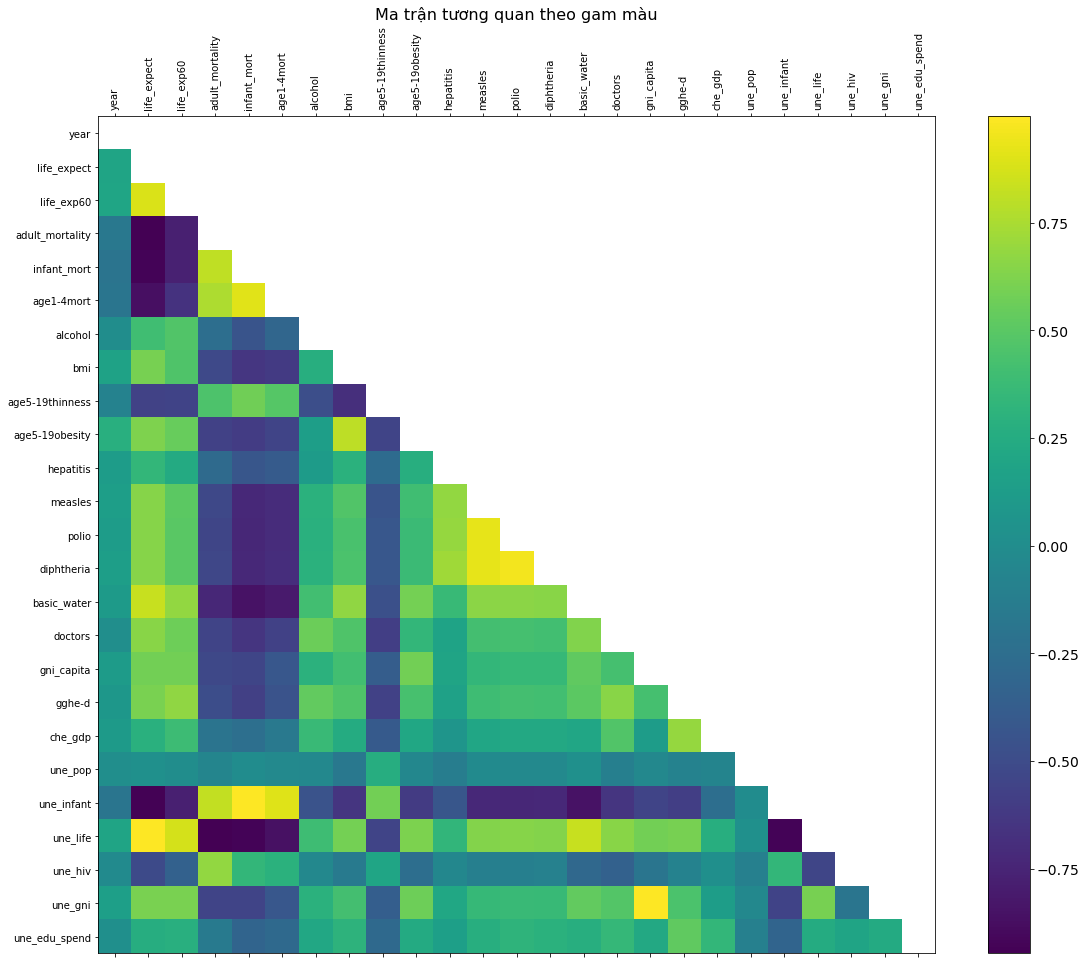

In [14]:
f = plt.figure(figsize=(19, 15))
plt.matshow(corr, fignum=f.number)
plt.xticks(range(life_exp_pro_df.select_dtypes(['number']).shape[1]), \
           life_exp_pro_df.select_dtypes(['number']).columns, fontsize=10, rotation=90)
plt.yticks(range(life_exp_pro_df.select_dtypes(['number']).shape[1]), \
           life_exp_pro_df.select_dtypes(['number']).columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Ma trận tương quan theo gam màu', fontsize=16);

**Nhận xét:** Từ 2 cách trực quan hóa ma trận tương quan như trên, ta rút ra:
* Các cặp (`une_life`, `life_expect`), (`une_infant`, `infant_mort`) và (`une_gni`, `gni_capita`) có độ tương quan cao thể hiện sự đồng biến (0.99 và 1.00). 
* Các cặp (`adult_mortality`, `life_expect`), (`une_life`, `adult_mortality`), (`une_life`, `infant_mort`),... có độ tương quan thấp (nghịch biến).
* Các mối quan hệ giữa 2 cột có độ tương quan càng cao hoặc càng thấp (nghĩa là càng tiến về 1 nếu đồng biến hoặc -1 nếu nghịch biến) càng có sự ảnh hưởng lẫn nhau và được xem là "good relationship". Các mối quan hệ có độ tương quan càng tiến về 0 cho thấy sự thay đổi giữa 2 cột không ổn định (nghĩa là khi cột này tăng, cột kia có thể tăng hoặc giảm, không có sự ổn định nhất định).

### Tiền xử lý

Quan sát các cặp cột có độ tương quan là 1.00 ở nhận xét trên, kết hợp với việc khảo sát sự phân bổ các giá trị numeric ở trên, ta thấy rằng: 
* Với 2 cột `une_infant` và `infant_mort`, tỉ lệ thiếu cả 2 cột là 0%, các giá trị về min, max, mean đều xấp xỉ nhau, chỉ khác về đơn vị (`une_infant` được tính trên 1000 người). 
* Với 2 cột `une_gni`, `gni_capita`, cột `gni_capita` có tỉ lệ thiếu là 21.92% trong khi đó cột `une_gni` tỉ lệ thiếu là 3.76%. 
Do đó, ta tiến hành loại bỏ các cột `infant_mort` và `gni_capita`

In [15]:
life_exp_pro_df = life_exp_pro_df.drop(columns=['infant_mort','gni_capita'])
life_exp_pro_df.shape

(3111, 26)

## Khám phá dữ liệu (tiếp tục)

### Kiểm tra dữ liệu có sự bất thường ở 4 cột country, country_code, region và year không? 

Mỗi nước phải được khảo sát trong 17 năm, liên tục từ 2000 đến 2016, country_code và region phải giống nhau qua từng năm ở mỗi nước qua trong các năm khảo sát. Kết quả được lưu vào biến `is_normal`, nếu biến này là `True` thì dữ liệu bình thường, hợp lý; ngược lại biến này mang giá trị là `False`.

In [16]:
values, counts = np.unique(life_exp_pro_df.groupby(['country', 'country_code', 'region']).size().values, \
                           return_counts=True)

max_year = life_exp_pro_df['year'].max()
min_year = life_exp_pro_df['year'].min()

num_countries = life_exp_pro_df['country'].nunique()

if len(values) == 1 and len(counts) == 1 \
    and values[0] == max_year - min_year + 1 and counts[0] == num_countries:
    is_normal = True
else: 
    is_normal = False
    
is_normal

True

### Khảo sát về tuổi thọ kỳ vọng ở các quốc gia

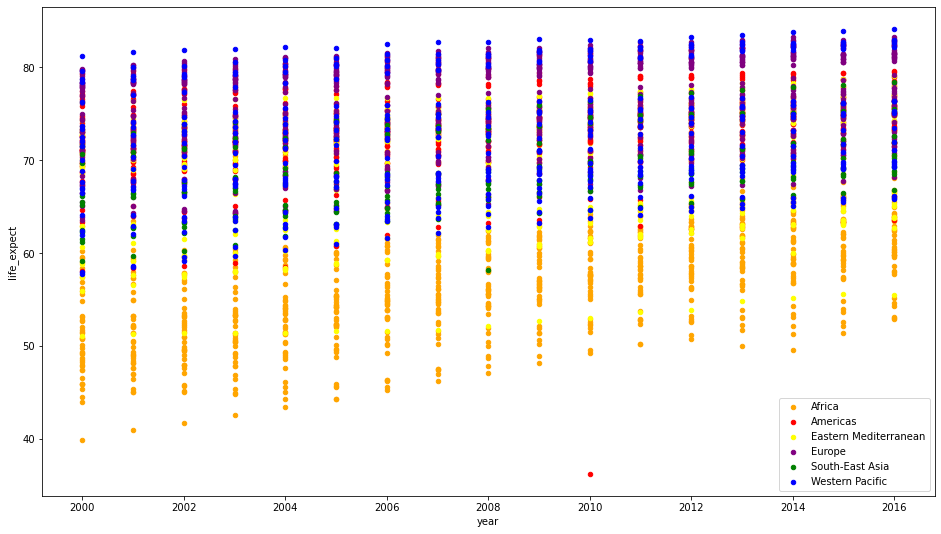

In [17]:
fig, ax = plt.subplots(figsize=(16, 9))

cdict = {'Africa': 'orange', 'Americas': 'red', 'Western Pacific': 'blue', \
         'South-East Asia': 'green', 'Europe': 'purple', 'Eastern Mediterranean':'yellow'}

grouped = life_exp_pro_df.groupby('region')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='year', y='life_expect', label=key, color=cdict[key])
plt.show()

**Nhận xét:** Ta thấy dữ liệu có 1 điểm bất thường, điểm này thể hiện ở khu vực châu Mỹ vào năm 2010. Ta tiếp tục khảo sát tỉ lệ tử vong xem có gì bất thường không?

Để có thể lấy được tỉ lệ tử vong, ta cần tính tổng 3 cột thể hiện tỉ lệ tử vong vốn có là `une_infant` (Tỉ lệ tử vong trẻ sơ sinh), `age1-4mort` (Tỉ lệ tử vong từ 1-4 tuổi) và `adult_mortality` (Tỉ lệ tử vong ở người trưởng thành).

Tuy nhiên để làm được việc này ta cũng cần biến đổi cột `age1-4mort` từ đơn vị tỉ lệ trên tổng số dân thành trên 1000 người giống 2 cột còn lại. Ta sẽ nhân cột `age1-4mort` cho 1000.

/tmp/ipykernel_30428/101554726.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mort_df['mort_rate'] = life_exp_pro_df['une_infant'] \


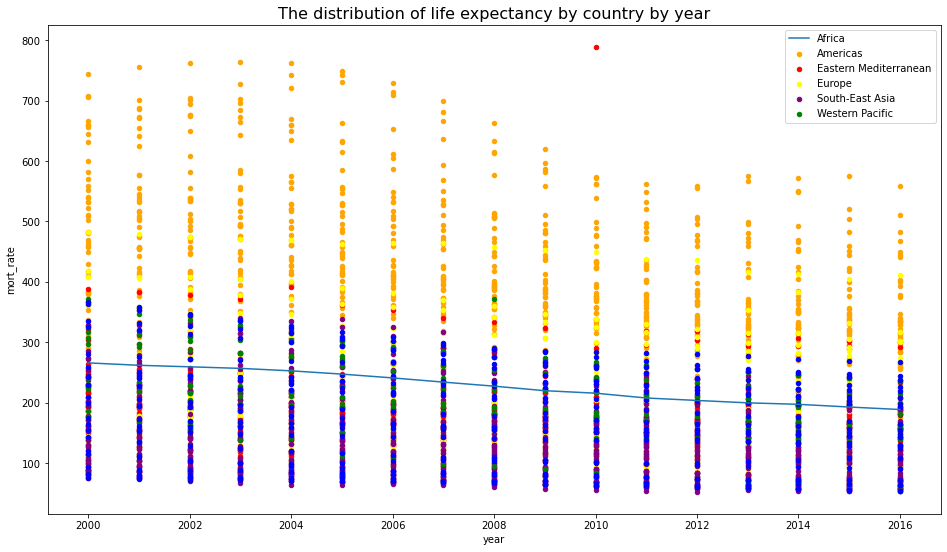

In [18]:
fig, ax = plt.subplots(figsize=(16, 9))

mort_df = life_exp_pro_df[['region', 
                           'year',
                           'country']]
mort_df['mort_rate'] = life_exp_pro_df['une_infant'] \
                        + life_exp_pro_df['age1-4mort'] * 1000 \
                        + life_exp_pro_df['adult_mortality']
mean_mort = mort_df.groupby('year')['mort_rate'].mean()
mean_mort.plot.line()
grouped = mort_df.groupby('region')

cdict = {'Africa': 'orange', 'Americas': 'red', 'Western Pacific': 'blue', \
         'South-East Asia': 'green', 'Europe': 'purple', 'Eastern Mediterranean':'yellow'}

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='year', y='mort_rate', label=key, color=cdict[key])
    
plt.title('The distribution of life expectancy by country by year',size=16)
plt.show()

**Nhận xét:** Tỉ lệ tử vong của 1 quốc gia nào đó ở chây Mỹ năm 2010 tăng bất thường. Ta kiểm tra xem đây là quốc gia nào.

In [19]:
ame_2010_df = mort_df[(mort_df['region'] == 'Americas') 
                          & (mort_df['year'] == 2010)]
idx_max = ame_2010_df['mort_rate'].idxmax()
max_mort_country = ame_2010_df.loc[idx_max]['country']
mort_df[mort_df['country'] == max_mort_country]

,region,year,country,mort_rate
1156,Americas,2000,Haiti,388.0838
1157,Americas,2001,Haiti,383.1980
1158,Americas,2002,Haiti,377.7411
1159,Americas,2003,Haiti,372.1137
1160,Americas,2004,Haiti,391.5365
1161,Americas,2005,Haiti,361.4985
1162,Americas,2006,Haiti,352.5454
1163,Americas,2007,Haiti,340.4888
1164,Americas,2008,Haiti,333.3753
1165,Americas,2009,Haiti,322.6790


Vậy quốc gia gây ra outlier chính là Haiti, với tỉ lệ tử vong năm 2010 vào xấp xỉ 789/1000 người, tăng khoảng gấp đôi so với các năm còn lại. Khám phá thêm về Haiti năm 2010 ta tìm được thông tin về [trận động đất năm 2010](https://www.history.com/this-day-in-history/massive-earthquake-strikes-haiti) gây thương vong vào khoản 200,000 người. Đó là nguyên nhân gây ra outlier trong tập dữ liệu.

Ta nhận thấy có thể dùng dataframe `mort_df` đã có để khảo sát thêm liệu còn các trường hợp quốc gia nào có biến động tương tự hay không. Ta sẽ vẽ line graph cho từng quốc gia trong từng khu vực qua các năm.

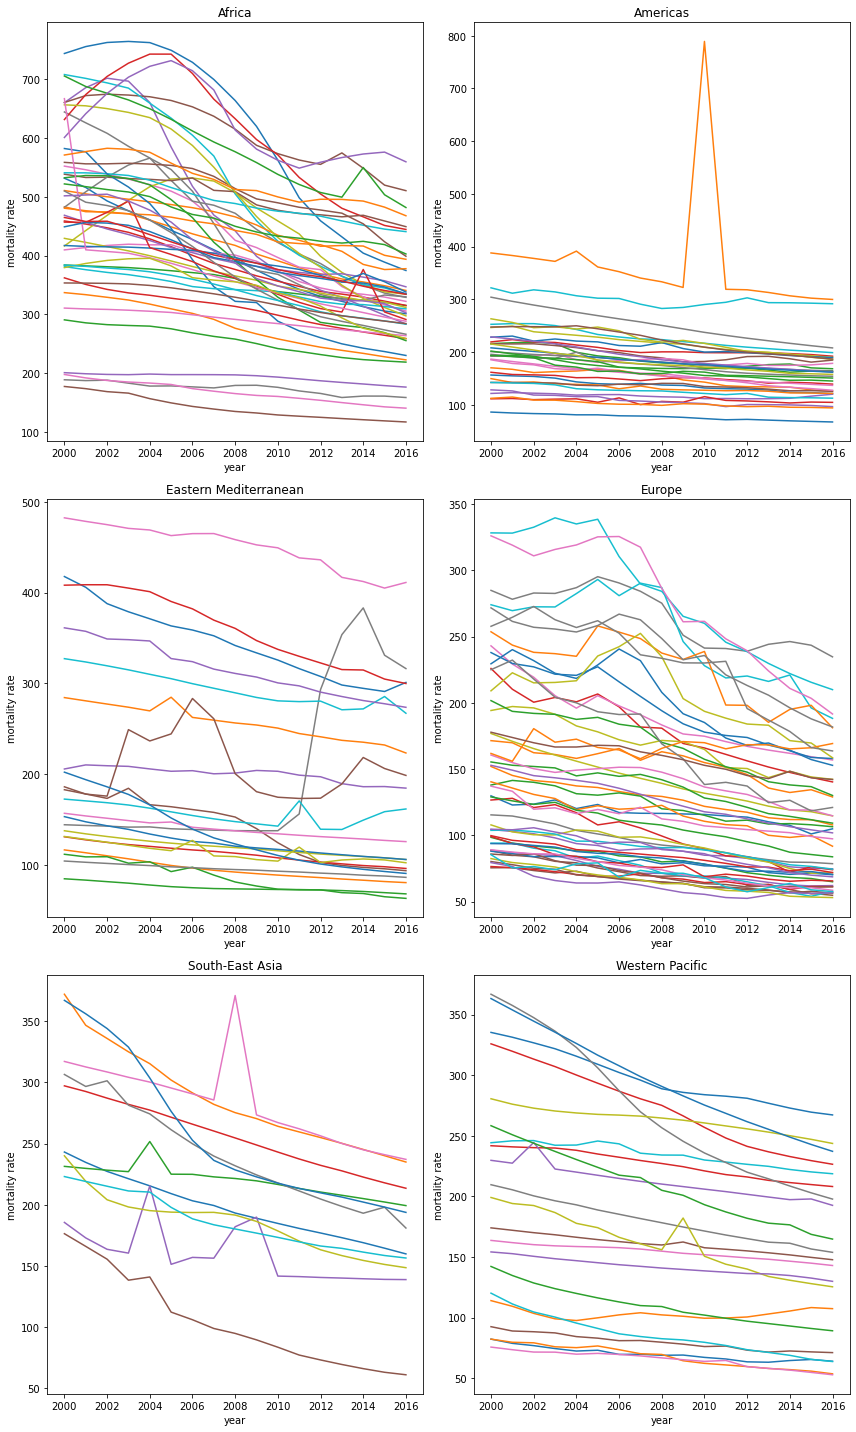

In [20]:
region_names = mort_df['region'].unique()
fig, axs = plt.subplots(3, 2)
fig.set_size_inches(12.0, 20.0)
for ireg, region in enumerate(region_names):
    ix = ireg//2
    iy = ireg%2
    axs[ix, iy].set_title(region)
    temp_df = mort_df[mort_df['region'] == region]
    for country in temp_df['country'].unique():
        axs[ix, iy].plot(temp_df[temp_df['country']==country]['year'], 
                         temp_df[temp_df['country']==country]['mort_rate'])
    axs[ix, iy].set_xlabel('year')
    axs[ix, iy].set_ylabel('mortality rate')
plt.tight_layout()
plt.show()

Ngoài khu vực Americas ra, khu vực SEA có một quốc gia cũng tăng đột tiến tỉ lệ tử vong vào năm 2008. Ta sẽ xem đây là quốc gia nào.

In [21]:
sea_2008_df = mort_df[(mort_df['region'] == 'South-East Asia') 
                          & (mort_df['year'] == 2008)]
idx_max = sea_2008_df['mort_rate'].idxmax()
max_mort_country = sea_2008_df.loc[idx_max]['country']
mort_df[mort_df['country'] == max_mort_country]

,region,year,country,mort_rate
2669,South-East Asia,2000,Myanmar,317.1834
2670,South-East Asia,2001,Myanmar,312.6910
2671,South-East Asia,2002,Myanmar,308.5709
2672,South-East Asia,2003,Myanmar,304.2299
2673,South-East Asia,2004,Myanmar,300.3090
2674,South-East Asia,2005,Myanmar,295.4544
2675,South-East Asia,2006,Myanmar,290.6440
2676,South-East Asia,2007,Myanmar,285.6596
2677,South-East Asia,2008,Myanmar,371.0818
2678,South-East Asia,2009,Myanmar,273.4639


Vậy quốc gia đó là Myanmar. Sau khi nhóm em thử tra cứu về Myanmar năm 2008 thì tìm hiểu được vào ngày 2/5/2008 có [cơn bão Nargis] (https://en.wikipedia.org/wiki/Cyclone_Nargis) diễn ra khiến ít nhất 138,373 người thiệt mạng. Như vậy xảy ra outlier này là hoàn toàn hợp lý.

Ngoài ra thấy ở khu vực Eastern Mediterranean cũng có một quốc gia có tỉ lệ tử vong tăng liên tục từ năm 2011 đến năm 2014. Ta khảo sát thử xem đây là quốc gia nào.

In [22]:
 mort_dif_df = mort_df[(mort_df['region'] == 'Eastern Mediterranean') 
                          & ((mort_df['year'] == 2011) \
                             | (mort_df['year'] == 2014))]
idx_max = pd.DataFrame(abs(mort_dif_df['mort_rate'].values[1::2] \
                           - mort_dif_df['mort_rate'].values[::2]), 
             columns=['mort_rate']).idxmax()
EM_country = mort_dif_df.reset_index().loc[idx_max * 2]['country'].values[0]
mort_df[mort_df['country'] == EM_country]

,region,year,country,mort_rate
1479,Eastern Mediterranean,2000,Syrian Arab Republic,144.5204
1480,Eastern Mediterranean,2001,Syrian Arab Republic,143.7098
1481,Eastern Mediterranean,2002,Syrian Arab Republic,143.0118
1482,Eastern Mediterranean,2003,Syrian Arab Republic,141.8945
1483,Eastern Mediterranean,2004,Syrian Arab Republic,142.1235
1484,Eastern Mediterranean,2005,Syrian Arab Republic,140.0798
1485,Eastern Mediterranean,2006,Syrian Arab Republic,139.2903
1486,Eastern Mediterranean,2007,Syrian Arab Republic,138.5614
1487,Eastern Mediterranean,2008,Syrian Arab Republic,138.0295
1488,Eastern Mediterranean,2009,Syrian Arab Republic,137.8754


Vậy quốc gia đó là Ả Rập Syrian. Ta sẽ  Sau khi tìm hiểu về Syrian năm 2011, nhóm đã phát hiện từ tháng 3 năm 2011 Syrian xảy ra [cuộc nội chiến đa đảng](https://en.wikipedia.org/wiki/Human_rights_in_Syria) và kéo dài đến tận ngày nay, gây thương vong về người rất lớn. Theo số liệu, tỉ lệ tử vong tăng mạnh (khoảng gấp đôi) từ 2011 đến 2014 và vẫn còn cao trong những năm sau đó.

- Ta thấy cần loại bỏ outlier của quốc gia Haiti vì mức tăng là khoảng 200% gây ra để tránh kết quả xấu khi thực hiện phân tích dữ liệu. 
- Trái lại, đối với trường hợp Myanmar, outlier này có mức tăng không đáng kể như Haiti. Ta không cần loại outlier này.
- Đối với Ả Rập Syrian, tuy mức tăng cũng vào khoảng trên 200% (năm 2014 so với 2011) nhưng những năm sau đó tỉ lệ tử vong ổn định và không có đột biến. Ta cũng giữ lại không loại outlier này.

=> Ta sẽ tiến hành loại dòng dữ liệu Haiti năm 2010

In [23]:
life_exp_pro_df.drop(life_exp_pro_df[(life_exp_pro_df['country'] == 'Haiti') 
                             & (life_exp_pro_df['year'] == 2010)].index, 
                 inplace=True)
life_exp_pro_df.shape

(3110, 26)

### Khảo sát cột Region

Quan sát một vài giá trị đầu và cuối của dữ liệu

In [24]:
life_exp_pro_df

,country,country_code,region,year,life_expect,life_exp60,adult_mortality,age1-4mort,alcohol,bmi,...,basic_water,doctors,gghe-d,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_edu_spend
0,Angola,AGO,Africa,2000,47.33730,14.73400,383.5583,0.025695,1.47439,21.7,...,41.14431,NaN,1.11099,1.90860,16395.473,122.2,46.522,1.0,2530.0,2.60753
1,Angola,AGO,Africa,2001,48.19789,14.95963,372.3876,0.024500,1.94025,21.8,...,42.25467,NaN,2.04631,4.48352,16945.753,118.9,47.059,1.1,2630.0,NaN
2,Angola,AGO,Africa,2002,49.42569,15.20010,354.5147,0.023260,2.07512,21.9,...,43.37680,NaN,1.30863,3.32946,17519.417,115.1,47.702,1.2,3180.0,NaN
3,Angola,AGO,Africa,2003,50.50266,15.39144,343.2169,0.021925,2.20275,22.0,...,44.36387,NaN,1.46560,3.54797,18121.479,110.8,48.440,1.3,3260.0,NaN
4,Angola,AGO,Africa,2004,51.52863,15.56860,333.8711,0.020545,2.41274,22.2,...,45.35134,0.621,1.68663,3.96720,18758.145,106.2,49.263,1.3,3560.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3106,Lao People's Democratic Republic,LAO,Western Pacific,2012,64.49448,16.57977,209.2666,0.004845,6.29833,22.4,...,72.07056,1.800,0.43670,2.07638,6444.530,47.5,65.267,0.3,4570.0,1.82147
3107,Lao People's Democratic Republic,LAO,Western Pacific,2013,64.79716,16.64219,205.1459,0.004600,6.42186,22.6,...,74.05544,4.493,0.71266,2.39985,6541.304,45.6,65.717,0.3,4980.0,3.23381
3108,Lao People's Democratic Republic,LAO,Western Pacific,2014,65.10757,16.70787,200.8204,0.004405,6.64447,22.7,...,76.02924,4.949,0.68373,2.29846,6639.756,43.7,66.144,0.3,5440.0,2.93781
3109,Lao People's Democratic Republic,LAO,Western Pacific,2015,65.45008,16.77074,196.6613,0.004160,6.83826,22.8,...,77.99142,NaN,0.86391,2.45366,6741.164,42.0,66.546,0.3,5810.0,NaN


**Nhận xét:** Nước Lào thuộc vào khu vực Tây Thái Bình Dương (đáng lẽ theo lẽ thường Lào phải thuộc về Đông Nam Á (South-East Asia)). Ta kiểm tra kỹ hơn về các khu vực có trong tập dữ liệu.

#### Có tất cả bao nhiêu khu vực và đó là những khu vực nào?

In [25]:
life_exp_pro_df.groupby(['region']).size() / (max_year - min_year + 1)

region
Africa                   47.000000
Americas                 32.941176
Eastern Mediterranean    21.000000
Europe                   50.000000
South-East Asia          11.000000
Western Pacific          21.000000
dtype: float64

Có 6 khu vực trong tập dữ liệu, khu vực châu Phi có 47 nước, châu Mỹ 33 nước, Đông Địa Trung Hải 21 nước, châu Âu 50 nước, Đông Nam Á 11 nước, Tây Thái Bình Dương 21 nước. Tiếp túc kiểm tra 2 khu vực Tây Thái Bình Dương và Đông Nam Á, xem thử có nước nào như nước Lào không?

In [26]:
life_exp_pro_df[life_exp_pro_df['region'] == 'Western Pacific']['country'].unique()

array(['Australia', 'Brunei Darussalam', 'China', 'Fiji',
       'Micronesia (Federated States of)', 'Tonga', 'Viet Nam', 'Vanuatu',
       'Samoa', 'Philippines', 'Papua New Guinea', 'Singapore',
       'Solomon Islands', 'Mongolia', 'Malaysia', 'New Zealand', 'Japan',
       'Cambodia', 'Kiribati', 'Republic of Korea',
       "Lao People's Democratic Republic"], dtype=object)

In [27]:
life_exp_pro_df[life_exp_pro_df['region'] == 'South-East Asia']['country'].unique()

array(['Bangladesh', 'Bhutan', 'Indonesia', 'India', 'Sri Lanka',
       'Maldives', 'Myanmar', 'Nepal',
       "Democratic People's Republic of Korea", 'Thailand', 'Timor-Leste'],
      dtype=object)

**Nhận xét:** Dường như cột `region` không phân chia theo khu vực mà đã học trong môn địa lý. Theo nhóm em có tìm hiểu thì WHO sẽ chia các nước trên thế giới thành 6 khu vực, ở mỗi khu vực sẽ có các văn phòng tương ứng. Cụ thể có thể xem tại [đây](https://www.who.int/about/who-we-are/regional-offices) hoặc [Wikipedia](https://en.wikipedia.org/wiki/List_of_WHO_regions).

---

## Đưa ra câu hỏi cần trả lời

* **Câu hỏi 1:** Các khu vực và các quốc gia trên thế giới có tuổi thọ biến động như thế nào từ năm 2000 đến năm 2016?
	
* **Câu hỏi 2:** Các vấn đề về y tế, kinh tế, xã hội có tác động như thế nào đến tuổi thọ của các quốc gia và các khu vực trên thế giới trong những năm 2000 đến năm 2016?

	* Y tế: Khảo sát sự tác động của tỷ lệ tiêm chủng (viêm gan, sởi, bại liệt, bạch hầu). 
	* Kinh tế: Khảo sát sự tác động của tổng thu nhập quốc dân, chi tiêu của chính phủ cho y tế, chi phí dân bỏ ra cho y tế, chi tiêu cho giáo dục giới tính.
	* Xã hội: Khảo sát sự tác động của tiêu thụ rượu, tỷ lệ người dân tiếp cận được nước sạch, tỷ lệ HIV/AIDS, dân số.

* **Câu hỏi 3:** Các vấn đề về y tế, kinh tế, xã hội ở các quốc gia đang phát triển và các quốc gia phát triển có gì khác biệt không? Nếu có thì sự khác biệt này như thế nào?

### Tiền xử lý

### Phân tích dữ liệu để trả lời cho các câu hỏi 

---

## Nhìn lại quá trình làm đồ án

---

## Tài liệu tham khảo

---